In [21]:
import pandas as pd
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

In [22]:
data  = pd.read_csv('../Datasets/frames_erosion.csv')
# separar los datos en características y etiquetas
X = data.drop('clase', axis=1)
y = data['clase']
# Separar las características (X) y las etiquetas (y)
#X = data.iloc[:, :-1].values
#y = data.iloc[:, -1].values


In [23]:

print("datos aleatorios y",y)

datos aleatorios y 0       LEFT
1       LEFT
2       LEFT
3       LEFT
4       LEFT
        ... 
8416     STR
8417     STR
8418     STR
8419     STR
8420     STR
Name: clase, Length: 8421, dtype: object


In [24]:
print("datos aleatorios X: ",X)

datos aleatorios X:         x1   x2   x3   x4   x5  x6  x7  x8  x9  x10  ...  x1143  x1144  x1145   
0       0    0    0    0    0   0   0   0   0    0  ...    255      0      0  \
1       0    0    0    0    0   0   0   0   0    0  ...      0      0      0   
2       0    0    0    0    0   0   0   0   0    0  ...    255    255    255   
3       0    0    0    0    0   0   0   0   0    0  ...    255    255    255   
4     255  255  255  255  255   0   0   0   0    0  ...    255    255    255   
...   ...  ...  ...  ...  ...  ..  ..  ..  ..  ...  ...    ...    ...    ...   
8416    0    0    0    0    0   0   0   0   0    0  ...      0      0      0   
8417    0    0    0    0    0   0   0   0   0    0  ...      0      0      0   
8418    0    0    0    0    0   0   0   0   0    0  ...      0      0      0   
8419    0    0    0    0    0   0   0   0   0    0  ...      0      0      0   
8420    0    0    0    0    0   0   0   0   0    0  ...      0      0      0   

      x1146  x1147

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [26]:
#Creamos y entrenamos elmmodelo SVM
model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)
# indicamos que los objetos de entrada no tendran una clase preasignada
model.feature_names_in_ = None
#joblib.dump(model, 'modelo_autonomo_svm.joblib')


In [27]:
X_test

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x1143,x1144,x1145,x1146,x1147,x1148,x1149,x1150,x1151,x1152
2465,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7848,0,0,0,0,0,0,0,0,255,255,...,255,255,255,255,0,0,255,255,255,255
6641,0,0,0,0,0,0,0,0,0,255,...,0,0,0,0,0,0,0,0,0,0
8280,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3978,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7966,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
2644,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
#Hacer preddiciones en los datos de prueba
predictions = model.predict(X_test)

C:\Users\icortesc\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [29]:
# Realizar predicciones en las nuevas muestras
precision = accuracy_score(y_test,predictions)
print("Precisión del modelo:", precision)

Precisión del modelo: 0.9845666798575385


In [30]:
# Función para graficar los puntos de datos y el hiperplano
def plot_data_with_hyperplane(X, y, model):
    plt.scatter(X[:, 0], X[:, 1],  c=y, cmap=plt.cm.Paired)
    
    # Obtener límites de los ejes
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Generar grid para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    XX, YY = np.meshgrid(xx, yy)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)
    
    # Graficar el hiperplano y los márgenes
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

In [31]:
# Graficar los datos y el hiperplano
plot_data_with_hyperplane(X,  y,model)

InvalidIndexError: (slice(None, None, None), 0)

In [ ]:
#Generamos una matriz de confusión
confusion_matrix = metrics.confusion_matrix(y_test,predictions)
confusion_matrix

array([[850,   8,   0],
       [ 18, 806,   5],
       [  0,   8, 832]], dtype=int64)

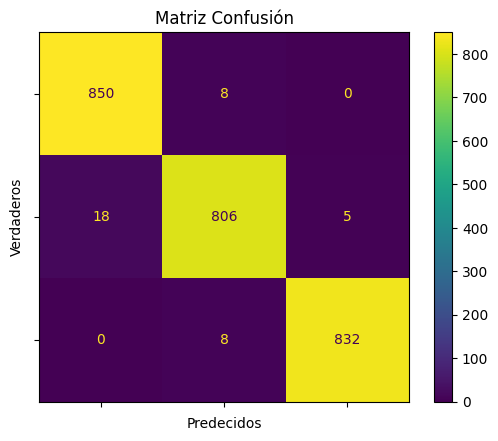

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['','',''])

cm_display.plot()
plt.title("Matriz Confusión")
plt.xlabel("Predecidos")
plt.ylabel("Verdaderos")
plt.show()

In [ ]:
#Obtener verdaderos de la matriz confusión
verdaderos = int(confusion_matrix[[0],[0]] + confusion_matrix[[1],[1]] + confusion_matrix[[2],[2]])
verdaderos

#Obtener falsos de la matriz confusión
falsos = int(confusion_matrix[[0],[1]] + confusion_matrix[[0],[2]] + confusion_matrix[[1],[0]] + confusion_matrix[[1],[2]] + confusion_matrix[[2],[0]] + confusion_matrix[[2],[1]])
falsos

exactitud = verdaderos / (verdaderos+falsos) * 100
print(f'El modelo tiene un porcentaje de exactitud de: {exactitud}%')

El modelo tiene un porcentaje de exactitud de: 98.45666798575385%


In [ ]:
# Generar nuevas muestras para predecir
new_samples, _ = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, 
                                     n_clusters_per_class=1, random_state=65)

# Realizar predicciones en las nuevas muestras
predictions = model.predict(new_samples)
print("Predicciones:", predictions)

ValueError: X has 2 features, but SVC is expecting 1152 features as input.